___
# Exercício: Modelos probabilísticos contínuos
___

## Aula 16

___
<div id="indice"></div>

## Índice

  - [Exercício 1](#ex1)
  - [Exercício 2](#ex2)
  - [Exercício 3](#ex3)
  - [Exercício 4](#ex4)
  - [Exercício 5](#ex5) **- APS7 disponível no Blackboard**
___

In [2]:
from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import numpy as np
import matplotlib.pyplot as plt

<div id="ex1"></div>

### EXERCÍCIO 1

Para X ~ N(90, 100), calcular:

a) $P(X \leq 115)$

b) $P(X \geq 80 | X < 100)$

c) O número $c$ tal que $P(X < c) = 0,975$

d) O número $d$ tal que $P(X > d) = 0,95$

e) O valor de $e$ tal que $P(90 - e \leq X \leq 90 + e) = 0,99$

*Respostas esperadas: (a)0.9937903346742238  (b)0.8114265826549397  (c)109.59963984540053 (d)73.55146373048528 (e)25.758293035489004*


In [3]:
# ESCREVA SEU CÓDIGO AQUI
#A)
#stats.norm.cdf(x, loc=mu, scale=sigma)
mu = 90
sigma = (100)**0.5
stats.norm.cdf(115, loc=mu, scale=sigma)

0.9937903346742238

In [4]:
#B)
# P(X>=80 dado X<100) = P(80 <= X < 100) / P(X<100)
num = (stats.norm.cdf(100, loc=mu, scale=sigma) - stats.norm.cdf(80, loc=mu, scale=sigma))
denom = stats.norm.cdf(100, loc=mu, scale=sigma)
prob = num/denom
prob

0.8114265826549397

In [5]:
#C)
stats.norm.ppf(0.975, loc=mu, scale=sigma)

109.59963984540053

In [6]:
#D)
stats.norm.ppf(0.05, loc=mu, scale=sigma)

73.55146373048527

In [7]:
#E)
x_maior = stats.norm.ppf(0.995, loc=mu, scale=sigma)
valor = x_maior - 90
valor

25.758293035489004

<div id="ex2"></div>

### EXERCÍCIO 2

As notas no quiz final de Ciência dos Dados distribuem-se segundo uma variável aleatória normal com média 6,5 e desvio padrão 1,6. O professor deseja dividir a classe em 3 categorias, da seguinte forma: os 30% que tiveram as maiores notas serão aprovados, os 50% com notas intermediárias ficarão de exame e os 20% que tiveram as menores notas serão reprovados. 

a) Quais os limites de nota entre cada uma das categorias?

b) Caso a nota para aprovação (sem ir para exame) fosse igual a 7,0 e uma turma tivesse 50 alunos, quantos desses seriam aprovados sem ir para o exame? 

*Respostas esperadas: (a)5.153406026283337 e 7.339040820332865    (b)19*

In [23]:
# ESCREVA SEU CÓDIGO AQUI
mu = 6.5
dp = 1.6

maiores_30 = stats.norm.ppf(0.70, loc=mu, scale=sigma)
intermediarios_50 = stats.norm.ppf(0.50, loc=mu, scale=sigma)
menores_20 = stats.norm.ppf(0.20, loc=mu, scale=sigma)


6.657320153812412

<div id="ex3"></div>

### EXERCÍCIO 3

Um determinado calçado é vendido em lojas populares e em lojas sofisticadas. De todas as lojas, 70%  são populares e 30%  são sofisticadas. Nas lojas populares seu preço segue uma distribuição normal com média 80 e desvio-padrão 12. Já em lojas sofisticadas, o preço também segue uma distribuição normal de média 160 e desvio-padrão 30. 

a) Determine maior preço considerando os 25% menores valores na distribuição de preços de uma loja popular.

b) Gastou-se mais de $100,00 para comprar o calçado. Qual é a probabilidade da compra ter sido feita numa loja popular?

*Respostas esperadas: (a)71.90612299764702    (b)0.10241995600307374*

In [25]:
# ESCREVA SEU CÓDIGO AQUI
mu=80
sigma=12
a=stats.norm.ppf(0.25, loc=mu, scale=sigma)
print('a)',a)

a) 71.90612299764702


In [26]:
# Popular
mu=80
sigma=12

# Sofisticado
muS=160
sigmaS=30

P_P = 0.7
P_Pc = 1-P_P

# P(X>100 e P)
P_Xmaior100_e_P = (1-stats.norm.cdf(100,loc=mu,scale=sigma))*P_P

# P(X>100 e S)
P_Xmaior100_e_Pc = (1-stats.norm.cdf(100,loc=muS,scale=sigmaS))*P_Pc

# P(X>100) = P(X>100 e P) + P(X>100 e S)
P_Xmaior100 = P_Xmaior100_e_P+P_Xmaior100_e_Pc

# P(P|X>100) = P(X>100 e P) / P(X>100)
print('b)',P_Xmaior100_e_P/P_Xmaior100)

b) 0.10241995600307373


<div id="ex4"></div>

### EXERCÍCIO 4

Em um processo industrial, o diâmetro de um rolamento é uma parte importante do processo.

Sabe-se que a probabilidade de um rolamento ter diâmetro maior do 2,98 cm é de 80%. 

Sabe-se, também que a probabilidade de que um rolamento tenha diâmetro abaixo de 2,97 cm é de 10%. 

a) Admitindo que o diâmetro de um rolamento segue uma distribuição normal, determine a média e o desvio-padrão dos diâmetros dos rolamentos que saem da linha de produção.

b) Determine a especificação que represente a maior distância da média, para mais ou para menos, contendo 95% dos rolamentos produzidos. 

*Respostas esperadas: (a) mu=2.9991307844085426 sigma=0.022730871852326348   (b)0.04455169016775473*

In [28]:
# ESCREVA SEU CÓDIGO AQUI

mup=0
sigmap=1

X_maior = 2.98
X_menor = 2.97

menor = stats.norm.ppf(0.1,loc=mup,scale=sigmap)
maior = stats.norm.ppf(0.8,loc=mup,scale=sigmap)

#Z*sigma + mu = X
print(menor)

-1.2815515655446004


In [29]:
A = np.array([[menor, 1],
              [maior, 1]])
b = np.array([X_menor, X_maior])
x = np.linalg.solve(A, b)
sigma = x[0]
mu = x[1]

print('a) Sigma: ',sigma,'\nMu: ',mu)

a) Sigma:  0.004709932231684842 
Mu:  2.976036021025125


In [30]:
menos,mais = stats.norm.interval(0.95,loc=mu,scale=sigma)

print(mais-mu)

0.009231297543726757


___
<div id="ex5"></div>

### EXERCÍCIO 5 - Modelagem do Tempo para resolver uma prova de MatVar

Um grupo de alunos de cada uma das três turmas que cursam Ciência dos Dados estava discutindo com intuito de modelar o tempo, em horas, que um aluno irá levar para fazer uma prova de Matemática da Variação. 

Após cada grupo de alunos chegar a um consenso, foi escolhido um modelo probabilístico contínuo diferente para cada turma A, B e C. Dessa forma, os três modelos foram escolhidos com intuito de descrever o comportamento da variável X: tempo, em horas, que um aluno irá levar para entregar uma prova de Matemática da Variação. Lembrando que um aluno tem até duas horas para fazê-la.

Esses três modelos são dados por:

> * **Turma A:** $X_A$ segue o seguinte modelo:
    $ f(x) = \left\{ \begin{array}[ll]\\
                +0.4-0.8x & \rm{se }\hspace{2mm} 0<x<0.5 \\
                -0.4+0.8x & \rm{se }\hspace{2mm} 0.5\leq x\leq2 \\
                0 & \rm{caso}\hspace{2mm}\rm{contrário} 
             \end{array} \right.$

> * **Turma B:** $X_B\sim Normal(1; 0.3^2)$, ou seja, $\mu=1$ e $\sigma=0.3$.

> * **Turma C:** $X_C\sim Uniforme(0; 2)$, ou seja, $a=0$ e $b=2$.




Admitindo que os alunos façam suas provas de forma independente uns dos outros, responda:
	
a) Estudando o comportamento da função densidade de probabilidade de cada modelo probabilístico, qual você entende ser o mais adequado para descrever o comportamento da variável X? E qual você entende ser o menos adequado? Justifique suas respostas após estudar o comportamento das fdp’s escolhidas por cada turma. *Nota: a fdp da turma A tem que ser construída usando a f(x) dada e, as demais, usando a função `pdf` do `scipy.stats`.

b) Qual a probabilidade de um aluno da turma B demorar mais do que 1 hora e meia para entregar a prova de Matemática da Variação? E na da turma C? 

c)	Atualmente, 34% dos alunos estão na turma A, 34% na B e 32% na C. Qual a probabilidade de um aluno qualquer (ou seja, um aluno de qualquer uma dessas três turmas) demorar mais do que uma hora e meia para entregar a prova final dessa disciplina?

d) Qual o menor tempo de entrega da prova dentre os últimos 20% de alunos que entregam na sala da turma B? E na da turma C? Interprete os resultados.


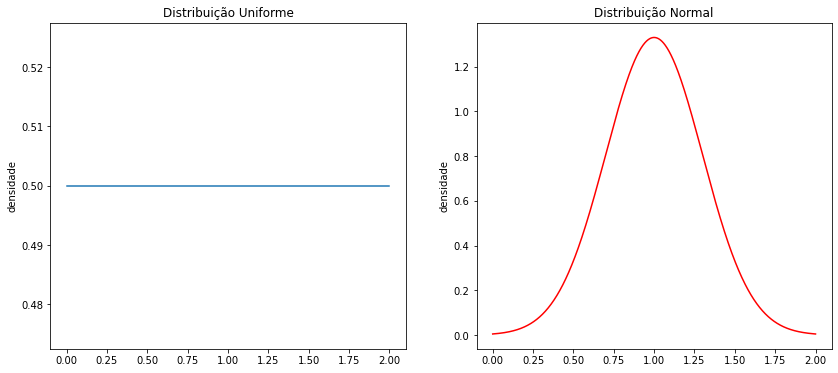

In [14]:
# ESCREVA SEU CÓDIGO AQUI

x = np.linspace(0,2,1000)

mu=1
sigma=0.3
B = stats.norm.pdf(x, loc=mu, scale=sigma)

a=0
b=2
C = stats.uniform.pdf(x, loc=a, scale=b-a)

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.plot(x, C)
plt.title('Distribuição Uniforme')
plt.ylabel('densidade')

plt.subplot(122)
plt.plot(x, B, color='red')
plt.title('Distribuição Normal')
plt.ylabel('densidade')

plt.show()

In [15]:
1-stats.norm.cdf(1.5, loc=mu, scale=sigma)

0.047790352272814696

In [16]:
stats.norm.ppf(0.8, loc=mu, scale=sigma)

1.2524863700718742

In [17]:
1-stats.uniform.cdf(1.5, loc=a, scale=b-a)

0.25

In [18]:
stats.uniform.ppf(0.8, loc=a, scale=b-a)

1.6